In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("housing.csv")

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.dropna()

In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [28]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis= 1)
y = data['median_house_value']

In [29]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [30]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [32]:
train_data = X_train.join(y_train)

In [33]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4561,-118.25,34.06,52.0,174.0,66.0,249.0,57.0,1.7763,<1H OCEAN,312500.0
5045,-118.33,33.97,47.0,1830.0,369.0,922.0,377.0,4.1635,<1H OCEAN,156400.0
19191,-122.70,38.45,47.0,904.0,154.0,310.0,144.0,3.9766,<1H OCEAN,190600.0
18857,-122.27,41.20,52.0,4513.0,985.0,1926.0,815.0,1.5923,INLAND,56000.0
703,-122.04,37.63,21.0,1307.0,236.0,586.0,249.0,4.7813,NEAR BAY,241900.0
...,...,...,...,...,...,...,...,...,...,...
10358,-117.67,33.60,20.0,1213.0,171.0,565.0,170.0,7.2592,<1H OCEAN,314800.0
5603,-118.28,33.79,36.0,1989.0,458.0,1668.0,455.0,3.3009,<1H OCEAN,168000.0
19870,-119.36,36.33,11.0,3221.0,617.0,1351.0,565.0,2.9844,INLAND,132000.0
2291,-119.78,36.80,34.0,3426.0,623.0,1938.0,647.0,2.8994,INLAND,66000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

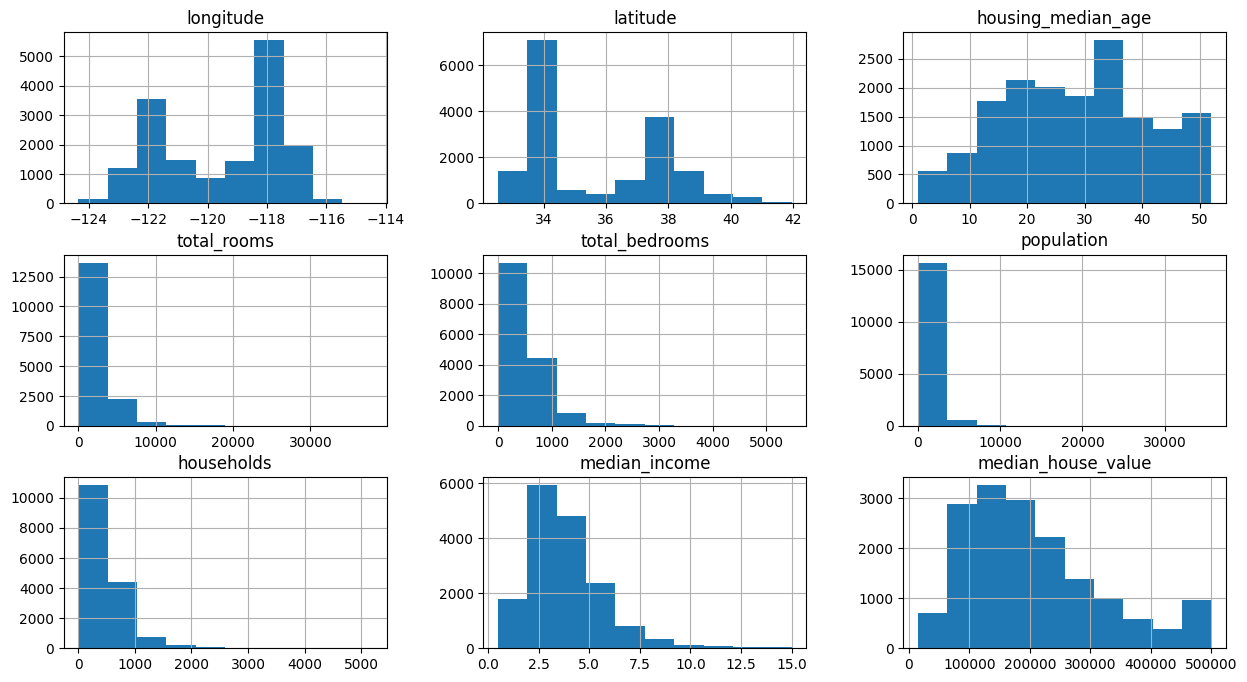

In [34]:
train_data.hist(figsize = (15, 8))

In [37]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

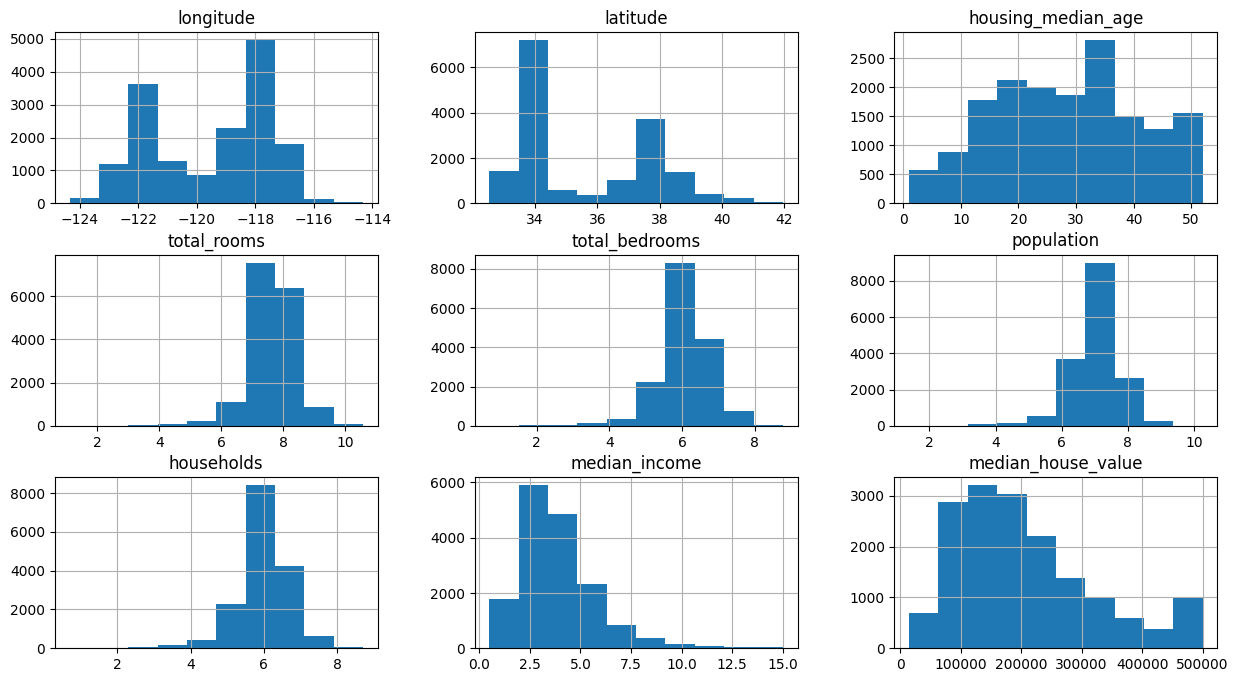

In [19]:
train_data.hist(figsize=(15, 8))

In [38]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4561,-118.25,34.06,52.0,5.164786,4.204693,5.521461,4.060443,1.7763,<1H OCEAN,312500.0
5045,-118.33,33.97,47.0,7.512618,5.913503,6.827629,5.934894,4.1635,<1H OCEAN,156400.0
19191,-122.70,38.45,47.0,6.807935,5.043425,5.739793,4.976734,3.9766,<1H OCEAN,190600.0
18857,-122.27,41.20,52.0,8.414939,6.893656,7.563720,6.704414,1.5923,INLAND,56000.0
703,-122.04,37.63,21.0,7.176255,5.468060,6.375025,5.521461,4.7813,NEAR BAY,241900.0
...,...,...,...,...,...,...,...,...,...,...
10358,-117.67,33.60,20.0,7.101676,5.147494,6.338594,5.141664,7.2592,<1H OCEAN,314800.0
5603,-118.28,33.79,36.0,7.595890,6.129050,7.419980,6.122493,3.3009,<1H OCEAN,168000.0
19870,-119.36,36.33,11.0,8.077758,6.426488,7.209340,6.338594,2.9844,INLAND,132000.0
2291,-119.78,36.80,34.0,8.139441,6.436150,7.569928,6.473891,2.8994,INLAND,66000.0


In [39]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7222
INLAND        5233
NEAR OCEAN    2081
NEAR BAY      1806
ISLAND           4
Name: count, dtype: int64

In [40]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4561,True,False,False,False,False
5045,True,False,False,False,False
19191,True,False,False,False,False
18857,False,True,False,False,False
703,False,False,False,True,False
...,...,...,...,...,...
10358,True,False,False,False,False
5603,True,False,False,False,False
19870,False,True,False,False,False
2291,False,True,False,False,False


In [41]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4561,-118.25,34.06,52.0,5.164786,4.204693,5.521461,4.060443,1.7763,<1H OCEAN,312500.0,True,False,False,False,False
5045,-118.33,33.97,47.0,7.512618,5.913503,6.827629,5.934894,4.1635,<1H OCEAN,156400.0,True,False,False,False,False
19191,-122.70,38.45,47.0,6.807935,5.043425,5.739793,4.976734,3.9766,<1H OCEAN,190600.0,True,False,False,False,False
18857,-122.27,41.20,52.0,8.414939,6.893656,7.563720,6.704414,1.5923,INLAND,56000.0,False,True,False,False,False
703,-122.04,37.63,21.0,7.176255,5.468060,6.375025,5.521461,4.7813,NEAR BAY,241900.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10358,-117.67,33.60,20.0,7.101676,5.147494,6.338594,5.141664,7.2592,<1H OCEAN,314800.0,True,False,False,False,False
5603,-118.28,33.79,36.0,7.595890,6.129050,7.419980,6.122493,3.3009,<1H OCEAN,168000.0,True,False,False,False,False
19870,-119.36,36.33,11.0,8.077758,6.426488,7.209340,6.338594,2.9844,INLAND,132000.0,False,True,False,False,False
2291,-119.78,36.80,34.0,8.139441,6.436150,7.569928,6.473891,2.8994,INLAND,66000.0,False,True,False,False,False


In [43]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [44]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4561,-118.25,34.06,52.0,5.164786,4.204693,5.521461,4.060443,1.7763,312500.0,True,False,False,False,False
5045,-118.33,33.97,47.0,7.512618,5.913503,6.827629,5.934894,4.1635,156400.0,True,False,False,False,False
19191,-122.70,38.45,47.0,6.807935,5.043425,5.739793,4.976734,3.9766,190600.0,True,False,False,False,False
18857,-122.27,41.20,52.0,8.414939,6.893656,7.563720,6.704414,1.5923,56000.0,False,True,False,False,False
703,-122.04,37.63,21.0,7.176255,5.468060,6.375025,5.521461,4.7813,241900.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10358,-117.67,33.60,20.0,7.101676,5.147494,6.338594,5.141664,7.2592,314800.0,True,False,False,False,False
5603,-118.28,33.79,36.0,7.595890,6.129050,7.419980,6.122493,3.3009,168000.0,True,False,False,False,False
19870,-119.36,36.33,11.0,8.077758,6.426488,7.209340,6.338594,2.9844,132000.0,False,True,False,False,False
2291,-119.78,36.80,34.0,8.139441,6.436150,7.569928,6.473891,2.8994,66000.0,False,True,False,False,False


In [45]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924188,-0.111385,0.027644,0.057573,0.109735,0.053628,-0.014523,-0.048424,0.322521,-0.056162,0.009510,-0.471346,0.040957
latitude,-0.924188,1.000000,0.013588,-0.029242,-0.064336,-0.136302,-0.085539,-0.080562,-0.142852,-0.449684,0.352596,-0.016712,0.353762,-0.155475
housing_median_age,-0.111385,0.013588,1.000000,-0.317600,-0.277113,-0.247650,-0.246485,-0.115613,0.105128,0.040839,-0.233465,0.021901,0.256886,0.023289
total_rooms,0.027644,-0.029242,-0.317600,1.000000,0.946006,0.864302,0.931360,0.202811,0.157732,0.022264,-0.010322,-0.008387,-0.021952,0.002316
total_bedrooms,0.057573,-0.064336,-0.277113,0.946006,1.000000,0.897375,0.974130,-0.028264,0.053310,0.042177,-0.042922,-0.003502,-0.020132,0.016336
population,0.109735,-0.136302,-0.247650,0.864302,0.897375,1.000000,0.932648,-0.004949,-0.021444,0.117130,-0.070770,-0.013924,-0.062821,-0.015718
households,0.053628,-0.085539,-0.246485,0.931360,0.974130,0.932648,1.000000,0.002307,0.073143,0.072931,-0.084998,-0.010586,-0.009603,0.019838
median_income,-0.014523,-0.080562,-0.115613,0.202811,-0.028264,-0.004949,0.002307,1.000000,0.686572,0.170618,-0.236586,-0.007965,0.058201,0.022573
median_house_value,-0.048424,-0.142852,0.105128,0.157732,0.053310,-0.021444,0.073143,0.686572,1.000000,0.257567,-0.486339,0.021304,0.167271,0.138640
<1H OCEAN,0.322521,-0.449684,0.040839,0.022264,0.042177,0.117130,0.072931,0.170618,0.257567,1.000000,-0.610514,-0.013919,-0.313554,-0.339810


<Axes: >

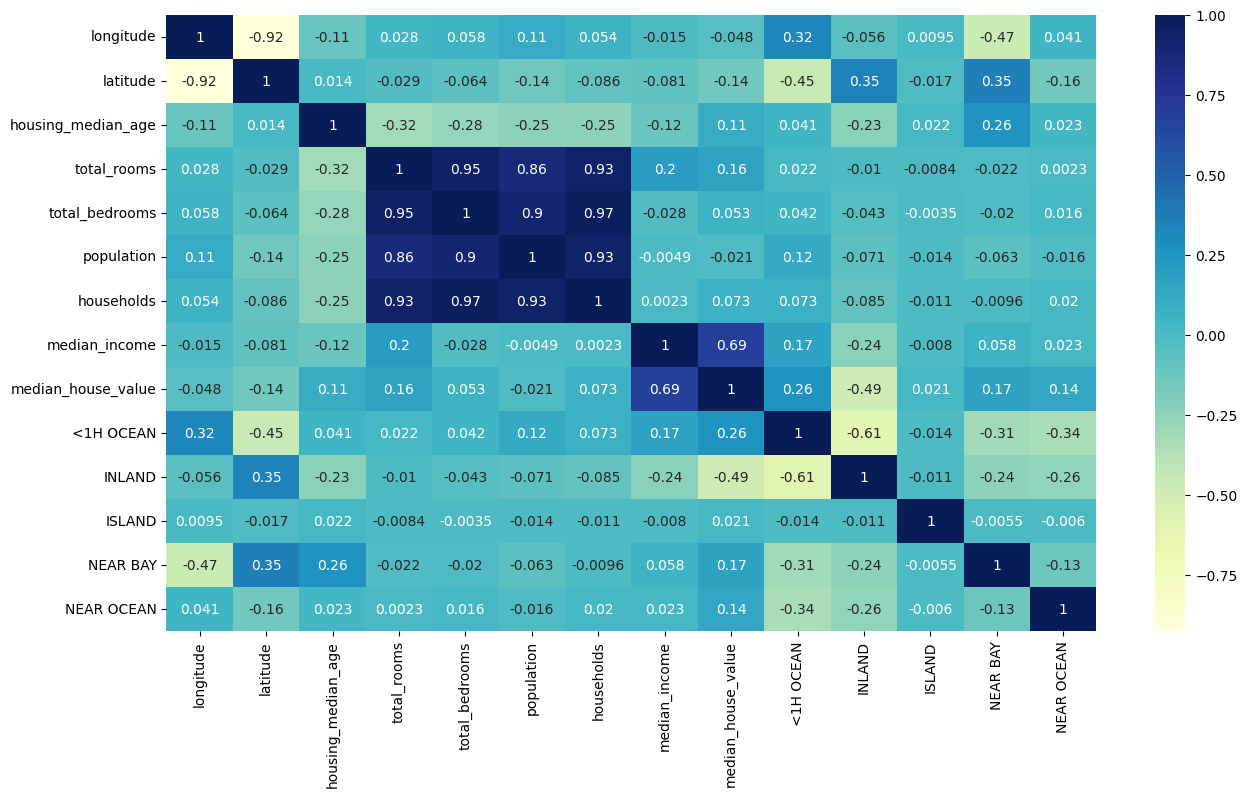

In [46]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [1]:
plt.figure(figsize(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house", palette = "cool_warm")

NameError: name 'plt' is not defined